## Lead Conversion Prediction Model using Machine Learning  

### 1.Importing libries 

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

### 2. Loading dataset

In [2]:
df=pd.read_csv('Lead Scoring.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 3.Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### There are to many Categorical columns and 3 integers and 2 float columns 

#### A)Removing not required columns 

In [4]:
df.drop(columns=['Prospect ID','Lead Number'],inplace=True)

#### B) Binary conversion

In [6]:
from sklearn.preprocessing import LabelEncoder
# Convert binary 'Yes'/'No' columns to 1/0 using Label Encoding
binary_cols = [
    "Do Not Email", "Do Not Call", "Search", "Magazine", "Newspaper Article",
    "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations",
    "Receive More Updates About Our Courses", "Update me on Supply Chain Content",
    "Get updates on DM Content", "I agree to pay the amount through cheque",
    "A free copy of Mastering The Interview"
]
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col].astype(str))

#### C) checking for Null values 

In [7]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

<Figure size 2000x1500 with 0 Axes>

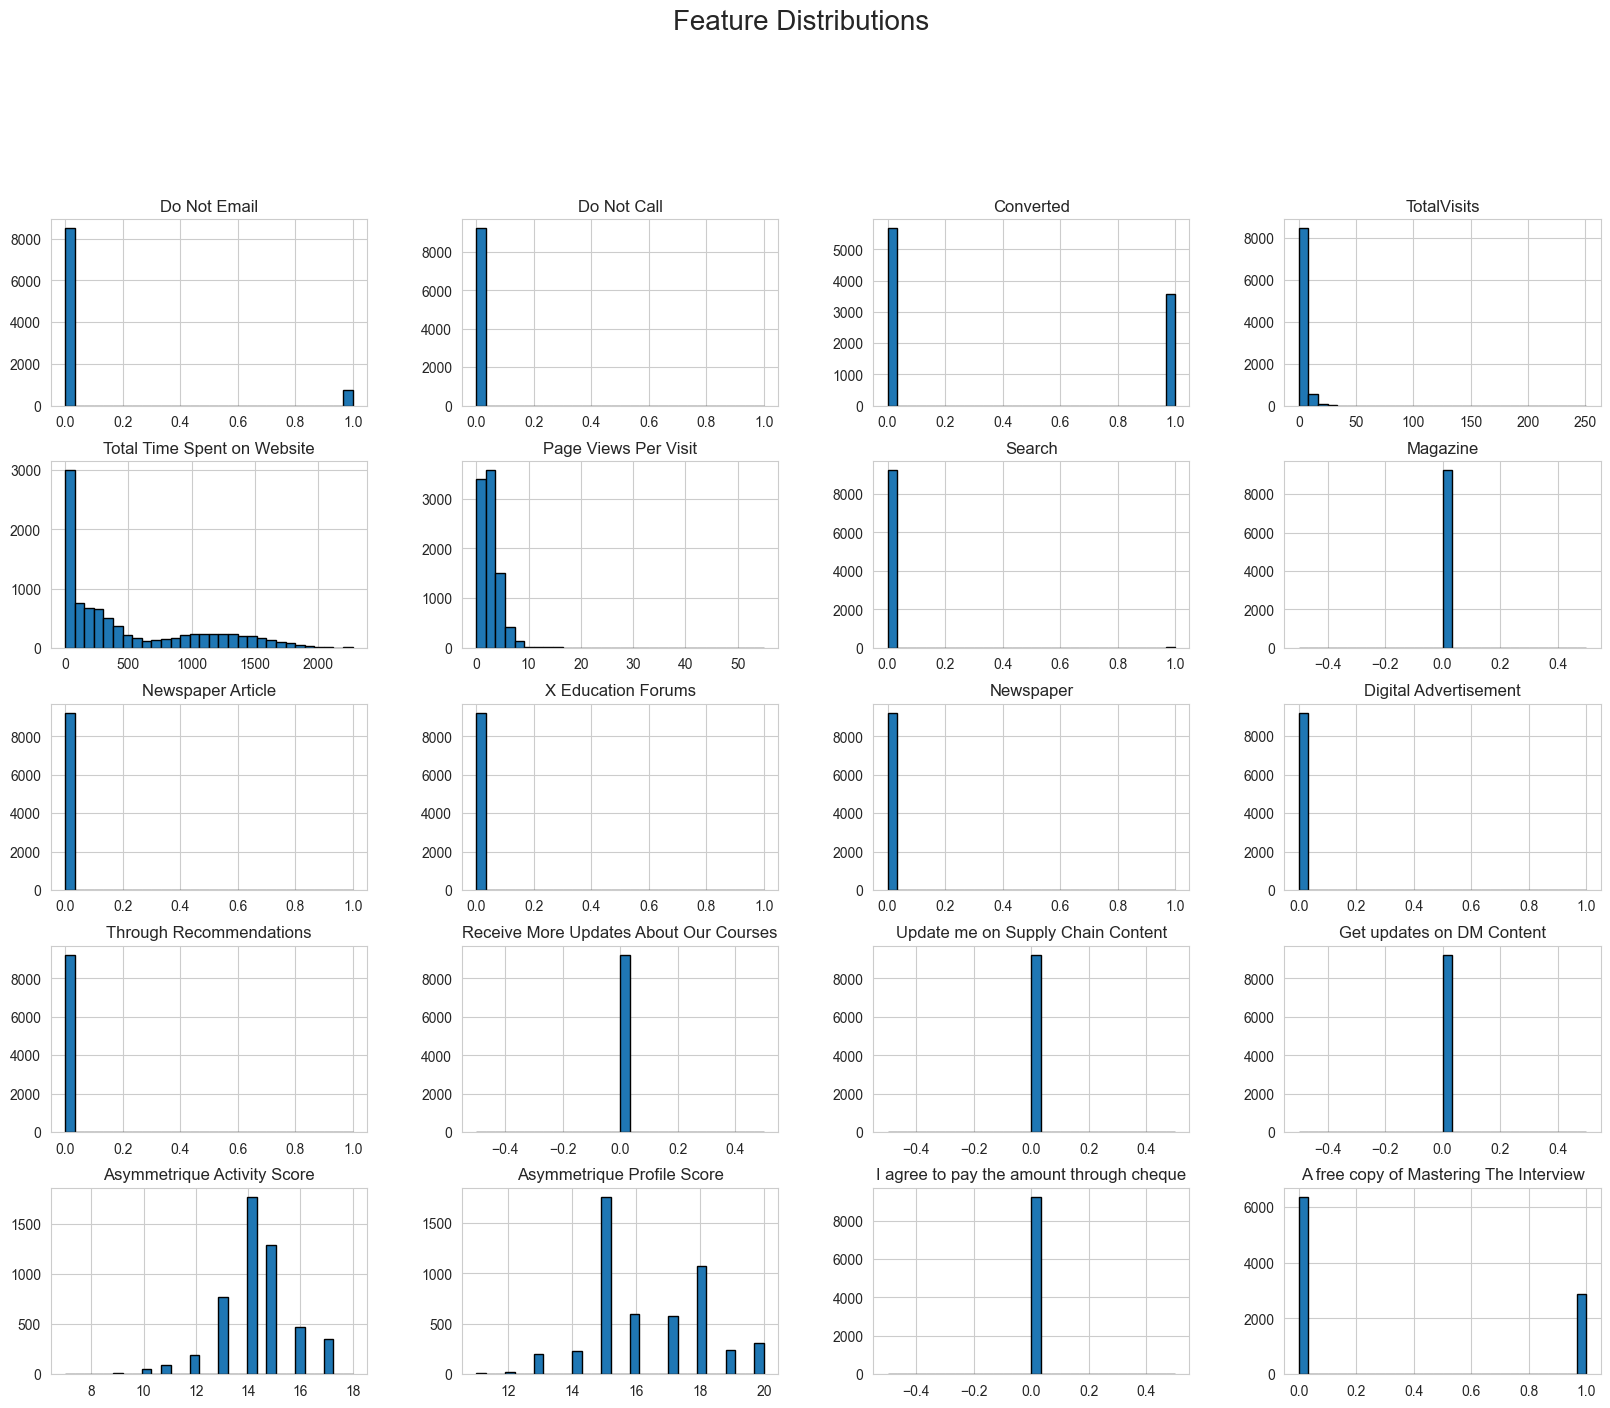

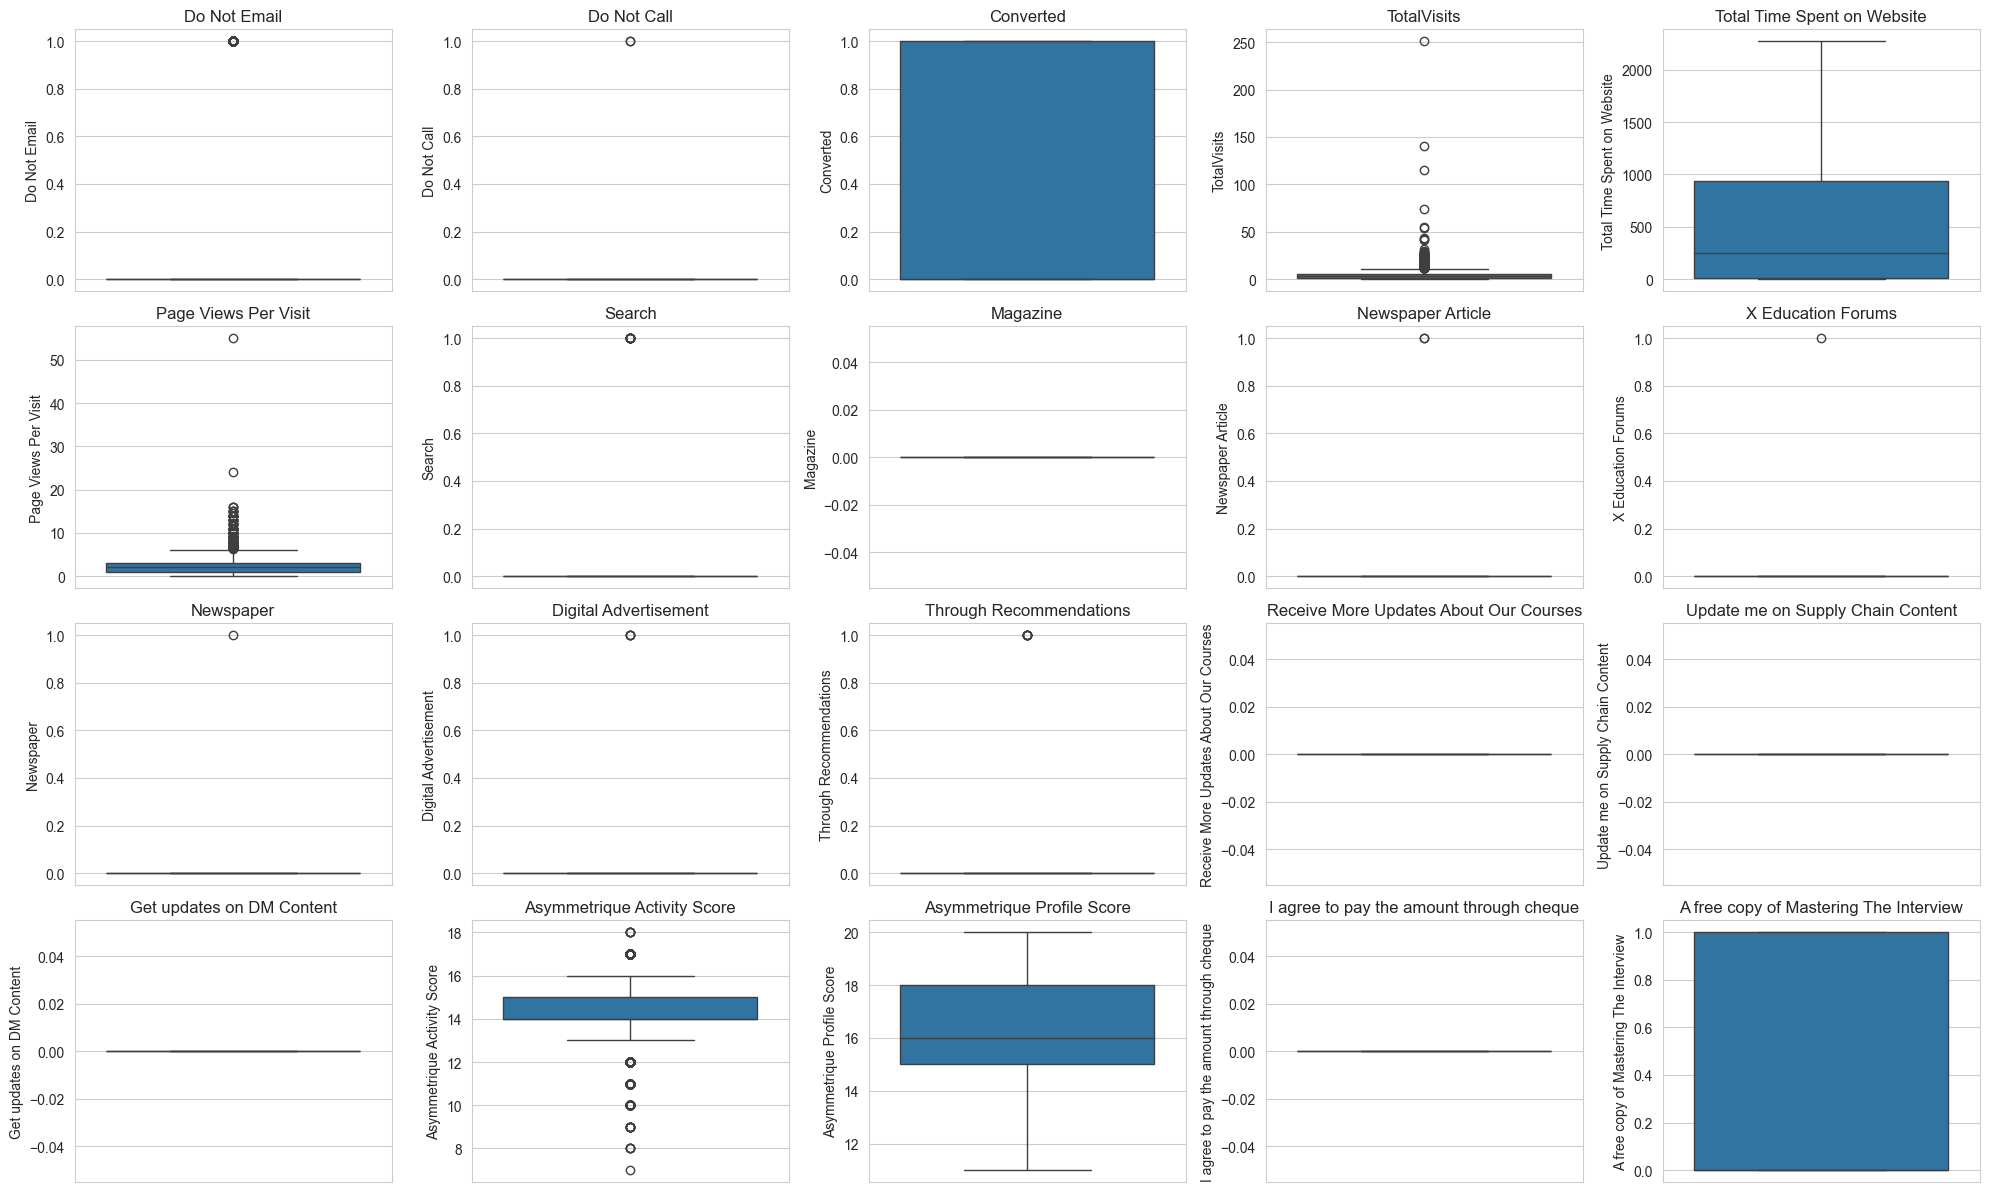

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 15))
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", y=1.02, fontsize=20)
plt.show()

plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [8]:
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



In [17]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [9]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int32  
 3   Do Not Call                                    9240 non-null   int32  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

#### D)Encoding for categorical variables 

In [10]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)

### Train - Test split

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop("Converted", axis=1)  # Features
y = df["Converted"]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

####  Standardize numerical features

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Model Selection and Training

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Tree-based models
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
#  Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}


# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    }
    print(f"{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 60)



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1136
           1       0.91      0.90      0.91       712

    accuracy                           0.93      1848
   macro avg       0.92      0.92      0.92      1848
weighted avg       0.93      0.93      0.93      1848

------------------------------------------------------------
Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1136
           1       0.87      0.89      0.88       712

    accuracy                           0.91      1848
   macro avg       0.90      0.91      0.90      1848
weighted avg       0.91      0.91      0.91      1848

------------------------------------------------------------
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      

In [15]:
# Show results
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.928571   0.928505  0.928571  0.928534
Decision Tree        0.908550   0.909019  0.908550  0.908723
Random Forest        0.928030   0.927886  0.928030  0.927924
Gradient Boosting    0.929654   0.929654  0.929654  0.929654


In [17]:
# Determine the best model based on multiple metrics
best_model = results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1).idxmax()
best_f1_model = results_df['F1 Score'].idxmax()
best_accuracy_model = results_df['Accuracy'].idxmax()
best_precision_model = results_df['Precision'].idxmax()

print(f"Best model based on all metrics: {best_model}")
print(f"Best model based on F1 Score: {best_f1_model} ({results_df['F1 Score'].max():.4f})")
print(f"Best model based on Accuracy: {best_accuracy_model} ({results_df['Accuracy'].max():.4f})")
print(f"Best model based on Precision: {best_precision_model} ({results_df['Precision'].max():.4f})")



Best model based on all metrics: Gradient Boosting
Best model based on F1 Score: Gradient Boosting (0.9297)
Best model based on Accuracy: Gradient Boosting (0.9297)
Best model based on Precision: Gradient Boosting (0.9297)


For deployment, the model choice depends on what you value more: precision/recall trade-off (F1 Score) or overall correctness (Accuracy). Let’s break it down:

Based on your lead scoring context, the best metric to focus on is the F1 Score because it balances precision and recall, ensuring both quality leads and missed opportunities are considered. Precision is also crucial, as you don’t want to waste resources chasing poor-quality leads.

In your code, the best models are:

🏆 Best Overall Model (All Metrics): {best_model}
⚖️ Best F1 Score: {best_f1_model} — Score: {results_df['F1 Score'].max():.4f}
🎯 Best Precision: {best_precision_model} — Score: {results_df['Precision'].max():.4f}
✅ Best Accuracy: {best_accuracy_model} — Score: {results_df['Accuracy'].max():.4f}
Since lead scoring benefits most from balancing precision and recall, I’d recommend deploying the model with the highest F1 Score. If precision is more important for your use case, go with the model that has the highest precision. Let me know if you’d like to implement any further enhancements, like handling imbalanced data or tuning hyperparameters! 🚀
